In [1]:
cd ../src/train_VAE/

/home/rfit/Telescope_Array/phd_work/src/train_VAE


In [2]:
import h5py as h5
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
# data_path = '/home3/rfit/Telescope_Array/phd_work/data/normed/pr_fe_q4_e1_0110_excl_sat_F_excl_geo_F.h5'
data_path = '/home3/rfit/Telescope_Array/phd_work/data/normed/pr_photon_q4_e1_0110_excl_sat_F_excl_geo_F.h5'
data_path = '/home3/rfit/Telescope_Array/phd_work/data/normed/pr_photon_0001_excl_sat_F_excl_geo_F.h5'

In [3]:
'''
mc_params (num_evs,10):
0. mc_event_num
1. mc_parttype (CORSIKA, 1 - gamma, 14 - proton, 5626 - Fe)
2. mc_corecounter, closest to core detector number
3. mc_E (for primaries other than photon energy is rescaled by 1/1.27, i.e. to proton FD energy scale)
4. mc_theta
5. mc_phi
6. mc_height_1st_inter, km
7. mc_xcore
8. mc_ycore
9. mc_border_distance, km 
'''
with h5.File(data_path,'r') as f:
    print('keys', list(f.keys()))
    test = f['test']
    keys = list(test.keys())
    mc_params = test['mc_params'][:]
    for k in keys:
        print(k, test[k].shape)

keys ['norm_param', 'test', 'train', 'val']
dt_mask (1143461, 2)
dt_params (26130485, 6)
ev_ids (1143461, 3)
ev_starts (1143462,)
mc_params (1143461, 10)
recos (1143461, 6)
wfs_flat (26130485, 128, 2)


In [4]:
try:
    import importlib
    importlib.reload(pipline)
except NameError:
    import pipline

Using device: cuda


2025-04-23 22:00:26.521933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745434826.536283    7438 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745434826.540525    7438 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745434826.551545    7438 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745434826.551565    7438 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745434826.551567    7438 computation_placer.cc:177] computation placer alr

In [6]:
config = 'config.yaml'
model = pipline.Pipline(config)
model.config['latent_dim'] = 16
chpt = "../../Models/AutoEncoder/Proton_train_lat=16/best"
model.load_chpt(chpt)

['pipline.py', '__pycache__', 'runs2', 'test', 'runs', 'datasets.py', 'runs_tests', 'model.py', 'test_particles', 'loss.py', 'tests', 'utils.py', 'init.sh', 'config.yaml', 'hists', '__init__.py', 'for_temporary_work', '.ipynb_checkpoints']
mc_params True
keys ['norm_param', 'test', 'train', 'val']
mc_params True
keys ['norm_param', 'test', 'train', 'val']
mc_params True
keys ['norm_param', 'test', 'train', 'val']
Encoder has params: 1097760 Decoder has params: 2406921
Saving Path: /home/rfit/Telescope_Array/phd_work/Models/AutoEncoder/Proton_train_lat=8_Pr+photon


In [10]:
latent_list, params, loss = model.predict_latent(write_embedding=False,
                                                NoneLoss = True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:33<00:00,  5.41it/s]


In [19]:
loss[10][0]

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.4992e-01, 4.3591e-03, 0.0000e+00, 2.5607e-04, 4.0532e-01, 4.7314e-01],
        [1.8843e-02, 2.0625e-03, 0.0000e+00, 3.2685e-04, 1.3502e-02, 4.7221e-02],
        [1.1120e-02, 1.2910e-02, 0.0000e+00, 3.7852e-06, 2.0628e-03, 1.4392e-02],
        [2.5701e-05, 3.1292e-02, 0.0000e+00, 1.2007e-04, 3.1749e-03, 2.6240e-01],
        [2.6761e-02, 2.2790e-03, 0.0000e+00, 6.3191e-05, 2.1502e-03, 4.7528e-02],
        [8.5441e-03, 3.2546e-03, 0.0000e+00, 5.7278e-06, 2.4089e-03, 1.7991e-01],
        [3.1014e-03, 5.0226e-04, 0.0000e+00, 1.4588e-04, 1.3995e-02, 3.4415e-01],
        [9.9162e-02, 5.9101e-03, 0.0000e+00, 1.7623e-04, 6.4376e-02, 5.0908e+00],
        [3.5829e-02, 1.0400e-02, 0.0000e+00, 7.4924e-05, 7.4273e-03, 9.3087e-01],
        [3.3075e-02, 6.4085e-04, 0.0000e+00, 2.3725e-04, 4.8312e-04, 8.2727e-03],
        [7.6988e-02, 1.9681e-02, 0.0000e+00, 3.2318e-04, 1.1062e-03, 1.5076e+00],
        [1.6802e

## Среднее значение функции потерь для сигнала и времен

In [63]:
num= 0
for i in loss:
    num+=i.shape[0]
num

1143461

In [68]:
loss_signal = torch.zeros(0,)
loss_time = torch.zeros(0,)
for batch in loss:
    loss_signal = torch.concat((loss_signal, batch[:,:,3][batch[:,:,3]>0]), dim=0)
    loss_time = torch.concat((loss_time, batch[:,:,5][batch[:,:,5]>0]), dim=0)
loss_signal.shape, loss_time.shape

(torch.Size([26130469]), torch.Size([26130484]))

In [70]:
loss_signal = torch.zeros(0,)
loss_time = torch.zeros(0,)
nums = 10
for batch in loss:
    loss_signal = torch.concat((loss_signal, batch[nums,:,3][batch[nums,:,3]>0]), dim=0)
    loss_time = torch.concat((loss_time, batch[nums,:,5][batch[nums,:,5]>0]), dim=0)
loss_signal.shape, loss_time.shape

(torch.Size([12917]), torch.Size([12917]))

Text(0.5, 0, 'loss_signal')

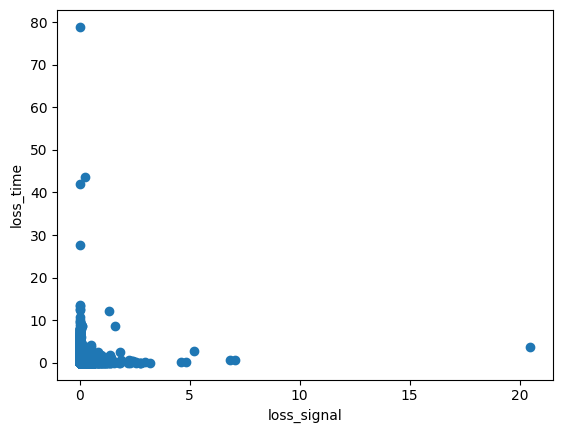

In [71]:
plt.scatter(loss_signal, loss_time)
plt.ylabel('loss_time')
plt.xlabel('loss_signal')

(-0.2, 5.0)

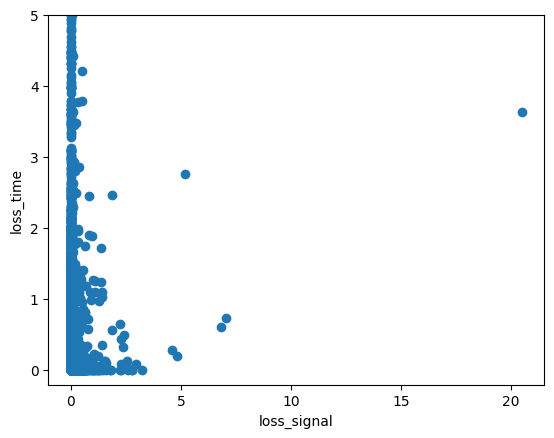

In [72]:
plt.scatter(loss_signal, loss_time)
plt.ylabel('loss_time')
plt.xlabel('loss_signal')
plt.ylim(-0.2,5)

(-0.05, 5.0)

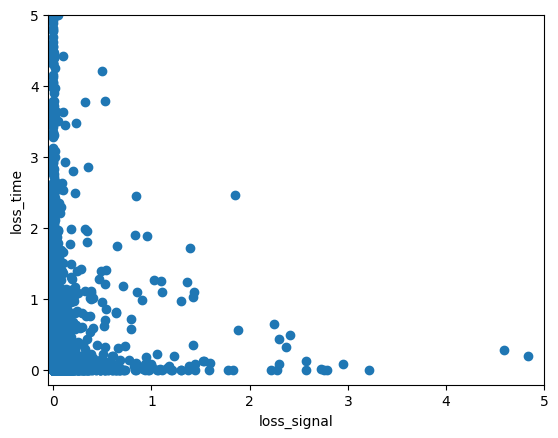

In [73]:
plt.scatter(loss_signal, loss_time)
plt.ylabel('loss_time')
plt.xlabel('loss_signal')
plt.ylim(-0.2,5)
plt.xlim(-0.05, 5)

In [74]:
#differet particle

In [87]:
loss[-1].shape

torch.Size([387, 49, 6])

In [123]:
loss_signal = {'pr':torch.zeros(0,), 'photon':torch.zeros(0,)}
loss_time = {'pr':torch.zeros(0,), 'photon':torch.zeros(0,)}
nums = 10
shape = 0
for i, batch in enumerate(loss):
    part = params[nums+ i*shape]
    shape = batch.shape[0]
    loss_signal[part] = torch.concat((loss_signal[part], batch[nums,:,3][batch[nums,:,3]>0]), dim=0)
    loss_time[part] = torch.concat((loss_time[part], batch[nums,:,5][batch[nums,:,5]>0]), dim=0)
# loss_signal.shape, loss_time.shape

IndexError: list index out of range

In [124]:
for part in ['pr','photon']:
    print(part, loss_signal[part].shape, loss_time[part].shape)

pr torch.Size([9559]) torch.Size([9559])
photon torch.Size([3348]) torch.Size([3348])


(-0.2, 5.0)

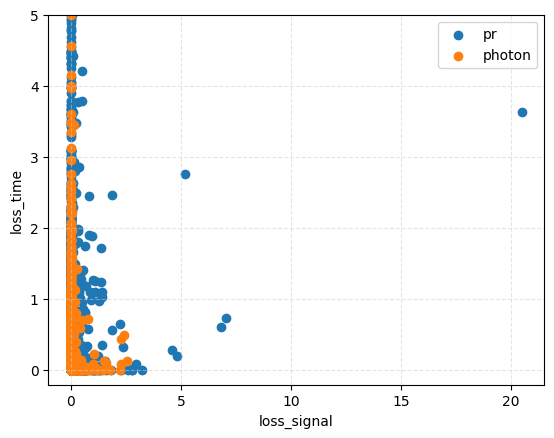

In [125]:
for part in ['pr','photon']:
    plt.scatter(loss_signal[part], loss_time[part], label=part)
plt.legend()
plt.ylabel('loss_time')
plt.xlabel('loss_signal')
plt.ylim(-0.2,5)
# plt.xlim(-0.05, 5)

(-0.05, 2.5)

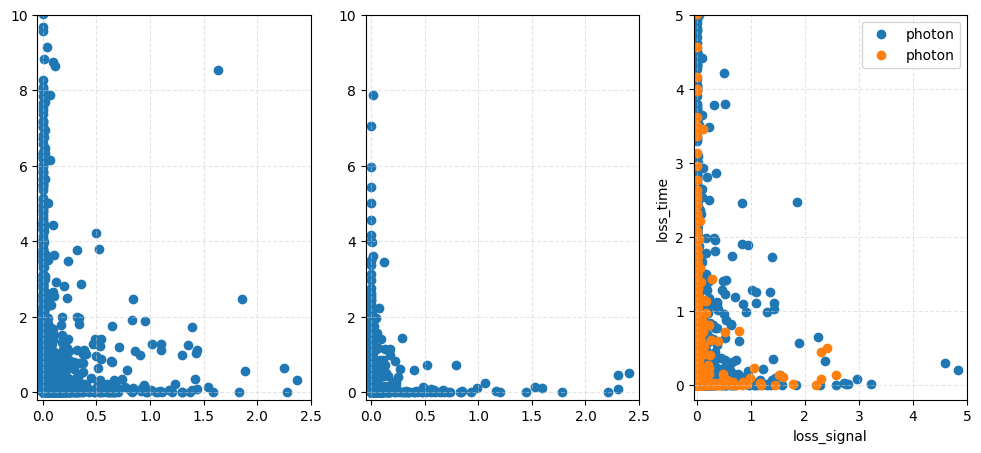

In [131]:
fig, axs= plt.subplots(1,3,figsize=(12,5))
axs[0].scatter(loss_signal['pr'], loss_time['pr'], label=part)

axs[1].scatter(loss_signal['photon'], loss_time['photon'], label=part)
axs[2].scatter(loss_signal['pr'], loss_time['pr'], label=part)

axs[2].scatter(loss_signal['photon'], loss_time['photon'], label=part)
plt.legend()
plt.ylabel('loss_time')
plt.xlabel('loss_signal')
plt.ylim(-0.2,5)
plt.xlim(-0.05, 5)

axs[0].set_ylim(-0.2,10)
axs[0].set_xlim(-0.05, 2.5)
axs[1].set_ylim(-0.2,10)
axs[1].set_xlim(-0.05, 2.5)
                      

In [102]:
plt.style.use('default')  # Сброс к стилю по умолчанию
plt.rcParams.update({
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.5,
    'grid.color': '#cccccc',
    'axes.facecolor': 'white'
})

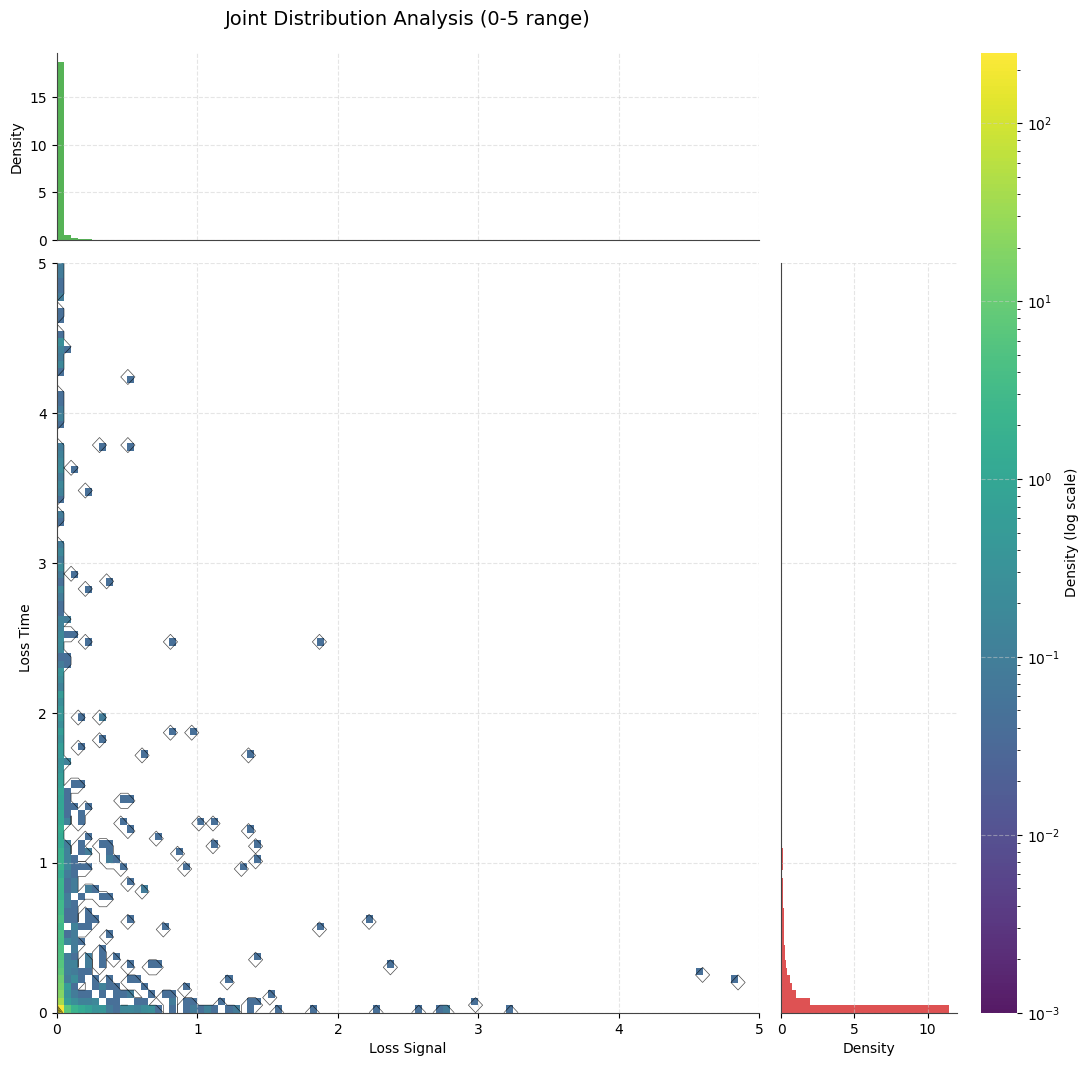

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm  # Для логарифмической шкалы цветов

# Настройка стиля
# plt.style.use('seaborn-whitegrid')
part = 'pr'

fig = plt.figure(figsize=(12, 12), facecolor='white')
gs = fig.add_gridspec(2, 2, 
                    width_ratios=(4, 1),
                    height_ratios=(1, 4),
                    left=0.1, right=0.85,
                    bottom=0.1, top=0.9,
                    wspace=0.05, hspace=0.05)

# Основная 2D гистограмма
ax_main = fig.add_subplot(gs[1, 0])
x = loss_signal[part].numpy()
y = loss_time[part].numpy()

bins = 100  # Увеличим количество бинов для детализации
range = [[0, 5], [0, 5]]

# Используем логическую нормализацию и минимальный порог
counts, xedges, yedges, im = ax_main.hist2d(
    x, y,
    bins=bins,
    range=range,
    density=True,
    cmap='viridis',
    norm=LogNorm(vmin=1e-3, vmax=counts.max()),  # Логарифмическая шкала цветов
    alpha=0.9
)

# Добавляем контуры для лучшей читаемости
ax_main.contour(
    counts.T, 
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    levels=5,
    colors='black',
    linewidths=0.5,
    alpha=0.7
)

# Цветовая шкала
ax_cbar = fig.add_axes([0.87, 0.1, 0.03, 0.8])
cbar = fig.colorbar(im, cax=ax_cbar, label='Density (log scale)')
cbar.outline.set_visible(False)

# Маргинальные распределения
ax_top = fig.add_subplot(gs[0, 0], sharex=ax_main)
ax_top.hist(x, bins=xedges, density=True, color='#2ca02c', alpha=0.8, range=(0,5))
ax_top.set(ylabel='Density', facecolor='white')
ax_top.grid(True, linestyle='--', alpha=0.5)
ax_top.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

ax_right = fig.add_subplot(gs[1, 1], sharey=ax_main)
ax_right.hist(y, bins=yedges, density=True, 
            orientation='horizontal', color='#d62728', alpha=0.8, range=(0,5))
ax_right.set(xlabel='Density', facecolor='white')
ax_right.grid(True, linestyle='--', alpha=0.5)
ax_right.tick_params(axis='y', which='both', left=False, labelleft=False)

# Настройка осей
ax_main.set(
    xlabel='Loss Signal', 
    ylabel='Loss Time',
    xlim=(0, 5),
    ylim=(0, 5),
    facecolor='white'
)

# Убираем рамки
for ax in [ax_main, ax_top, ax_right]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('#444444')
    ax.spines['left'].set_color('#444444')

ax_top.set_title('Joint Distribution Analysis (0-5 range)', pad=20, fontsize=14)

plt.show()

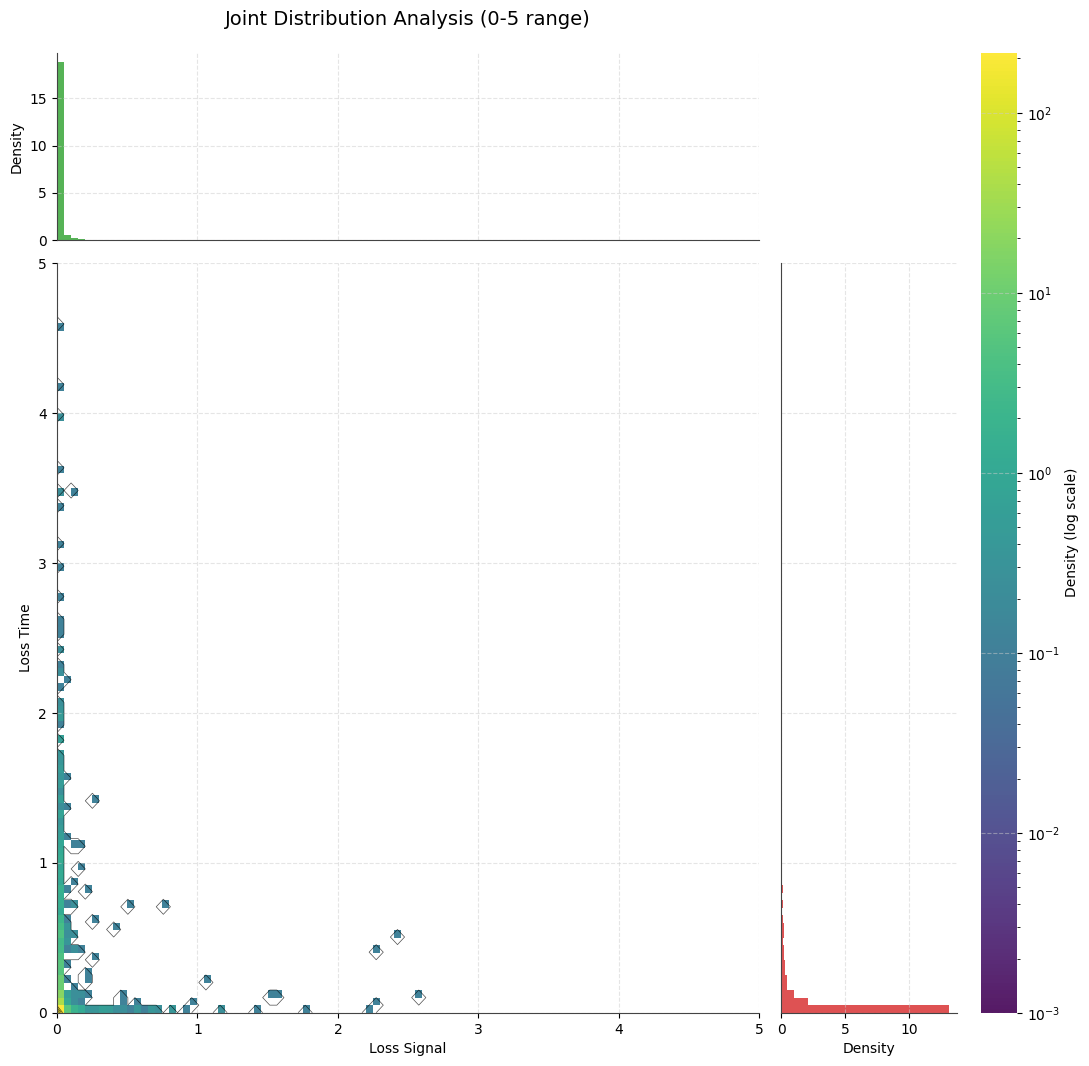

In [105]:
part = 'photon'
fig = plt.figure(figsize=(12, 12), facecolor='white')
gs = fig.add_gridspec(2, 2, 
                    width_ratios=(4, 1),
                    height_ratios=(1, 4),
                    left=0.1, right=0.85,
                    bottom=0.1, top=0.9,
                    wspace=0.05, hspace=0.05)

# Основная 2D гистограмма
ax_main = fig.add_subplot(gs[1, 0])
x = loss_signal[part].numpy()
y = loss_time[part].numpy()

bins = 100  # Увеличим количество бинов для детализации
range = [[0, 5], [0, 5]]

# Используем логическую нормализацию и минимальный порог
counts, xedges, yedges, im = ax_main.hist2d(
    x, y,
    bins=bins,
    range=range,
    density=True,
    cmap='viridis',
    norm=LogNorm(vmin=1e-3, vmax=counts.max()),  # Логарифмическая шкала цветов
    alpha=0.9
)

# Добавляем контуры для лучшей читаемости
ax_main.contour(
    counts.T, 
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    levels=5,
    colors='black',
    linewidths=0.5,
    alpha=0.7
)

# Цветовая шкала
ax_cbar = fig.add_axes([0.87, 0.1, 0.03, 0.8])
cbar = fig.colorbar(im, cax=ax_cbar, label='Density (log scale)')
cbar.outline.set_visible(False)

# Маргинальные распределения
ax_top = fig.add_subplot(gs[0, 0], sharex=ax_main)
ax_top.hist(x, bins=xedges, density=True, color='#2ca02c', alpha=0.8, range=(0,5))
ax_top.set(ylabel='Density', facecolor='white')
ax_top.grid(True, linestyle='--', alpha=0.5)
ax_top.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

ax_right = fig.add_subplot(gs[1, 1], sharey=ax_main)
ax_right.hist(y, bins=yedges, density=True, 
            orientation='horizontal', color='#d62728', alpha=0.8, range=(0,5))
ax_right.set(xlabel='Density', facecolor='white')
ax_right.grid(True, linestyle='--', alpha=0.5)
ax_right.tick_params(axis='y', which='both', left=False, labelleft=False)

# Настройка осей
ax_main.set(
    xlabel='Loss Signal', 
    ylabel='Loss Time',
    xlim=(0, 5),
    ylim=(0, 5),
    facecolor='white'
)

# Убираем рамки
for ax in [ax_main, ax_top, ax_right]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('#444444')
    ax.spines['left'].set_color('#444444')

ax_top.set_title('Joint Distribution Analysis (0-5 range)', pad=20, fontsize=14)

plt.show()

pr
signal 0.02609877 0.27876294
time 0.29370216 1.0433782
signal/time 186763730.0 14516157000.0


photon
signal 0.01924625 0.1279674
time 0.18106692 1.4455075
signal/time 3676223.2 163983120.0




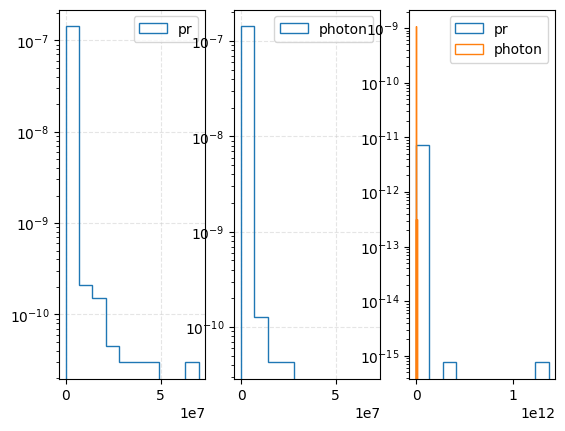

In [122]:
# 
fig, axs = plt.subplots(1,3)
particles = ['pr', 'photon']
for part in particles:
    x = loss_signal[part].numpy()
    y = loss_time[part].numpy()
    print(part)
    print('signal', x.mean(), x.std())
    print('time', y.mean(), y.std())
    z=y/x
    print('signal/time', z.mean(), z.std())
    print('\n')
    if part == 'pr':
        axs[0].hist(z, histtype = 'step',range=(0,7e7),  label = part, log=True, density=True)
    else:
        axs[1].hist(z, histtype = 'step', range=(0,7e7), label = part, log=True, density=True)
    axs[2].hist(z, histtype = 'step', label = part, log=True, density=True)
axs[0].legend()
axs[1].legend()
plt.legend()
plt.grid()

## detctor dist

In [66]:
'''
mc_params (num_evs,10):
0. mc_event_num
1. mc_parttype (CORSIKA, 1 - gamma, 14 - proton, 5626 - Fe)
2. mc_corecounter, closest to core detector number
3. mc_E (for primaries other than photon energy is rescaled by 1/1.27, i.e. to proton FD energy scale)
4. mc_theta
5. mc_phi
6. mc_height_1st_inter, km
7. mc_xcore
8. mc_ycore
9. mc_border_distance, km 
'''
mc_params.shape

(1143461, 10)

In [146]:
theta = mc_params[:,4]/180*3,1415
phi = mc_params[:,5]/180*3,1415
# почемуто тьюпл
theta =theta[0]
phi= phi[0]

(array([ 18739.,  57292.,  83888., 107942., 153502., 174415., 200923.,
        206549., 137134.,   3077.]),
 array([0.00628473, 0.11387843, 0.22147212, 0.32906581, 0.43665951,
        0.5442532 , 0.65184689, 0.75944059, 0.86703428, 0.97462797,
        1.08222167]),
 <BarContainer object of 10 artists>)

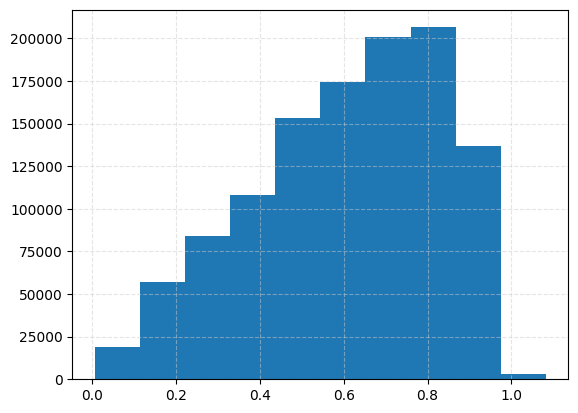

In [147]:
plt.hist(theta)

In [152]:
import numpy as np
# в коде реконтрукции

#n=-tf.concat([tf.math.cos(phi)*tf.math.sin(theta),tf.math.sin(phi)*tf.math.sin(theta),tf.math.cos(theta)],axis=-1)
def distant(x, y, th, phi):
    """
    Вычисляет расстояние от точки (x, y, 0) до прямой, проходящей через начало координат
    с направлением, заданным сферическими углами th (θ) и phi (φ)
    
    Параметры:
    x, y - координаты точки в плоскости XY
    th - полярный угол (от оси Z) в радианах (0 ≤ th ≤ π/2)
    phi - азимутальный угол в радианах (0 ≤ phi < 2π)
    
    Возвращает:
    Расстояние от точки до прямой
    """
    # Направляющий вектор прямой
    direction = np.array([
        np.sin(th) * np.cos(phi),
        np.sin(th) * np.sin(phi),
        np.cos(th)
    ])
    
    # Вектор из начала координат к точке (x, y, 0)
    point_vector = np.array([x, y, 0])
    
    # Вычисляем векторное произведение
    cross_product = np.cross(point_vector, direction)
    
    # Расстояние равно длине векторного произведения (так как direction - единичный вектор)
    return np.linalg.norm(cross_product)

In [153]:
distant(10, 10, 3.1415/4, 3.1415)

12.247921508134999

Кажется верно!!!


In [154]:
theta.shape

(1143461,)

In [157]:
loss_per_ev = []
for l_batch in loss:
    for l_ev in l_batch:
        loss_per_ev.append(l_ev)
len(loss_per_ev)

1143461

In [160]:
loss_all = {'pr', torch.zeros(0,),
           'photon', torch.zeros(0,)}
dist_all = {'pr', torch.zeros(0,),
           'photon', torch.zeros(0,)}

In [158]:
loss_per_ev[0]

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1020e-02, 1.2076e-03, 0.0000e+00, 5.0560e-07, 1.2554e-02, 1.5839e-03],
        [1.7050e-03, 4.4510e-04, 0.0000e+00, 8.6123e-05, 4.6568e-03, 4.4799e-04],
        [1.3551e-03, 2.4280e-02, 0.0000e+00, 3.7493e-04, 1.2725e-04, 1.0300e-02],
        [1.8374e-03, 3.0484e-02, 0.0000e+00, 1.0539e-05, 2.7252e-03, 7.1739e-03],
        [3.3633e-03, 2.0968e-02, 0.0000e+00, 8.6044e-04, 4.7906e-03, 2.7522e-05],
        [3.9920e-03, 8.1048e-02, 0.0000e+00, 1.9671e-04, 2.8094e-02, 8.7722e-03],
        [6.9901e-04, 7.2807e-03, 0.0000e+00, 1.9269e-05, 2.9315e-02, 3.2728e-02],
        [1.1328e-02, 3.1138e-02, 0.0000e+00, 2.1964e-04, 1.2281e-02, 5.0233e-03],
        [7.2089e-03, 4.5353e-05, 0.0000e+00, 2.9855e-06, 1.5083e-02, 6.5908e-02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e

In [ ]:
for l_detect in loss_per_ev:
    x=l_detect[0]
    y=l_detect